<a href="https://colab.research.google.com/github/UmeshGayashan/Emotion_Detection_Model/blob/master/Human_Emotion_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install kaggle

Mount Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
! mkdir ~/.kaggle

Set up the Kaggle API

In [4]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets list

ref                                                             title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rabieelkharoua/students-performance-dataset                     📚 Students Performance Dataset 📚                  66KB  2024-06-12 23:09:20           3400         65  1.0              
mayankanand2701/samsung-stock-price-dataset                     Samsung Stock Price Dataset 📱🏭📈                  114KB  2024-06-13 14:51:11           1159         30  1.0              
shreyanshverma27/online-sales-dataset-popular-marketplace-data  Online Sales Dataset - Popular Marketplace Data    7KB  2024-05-25 23:55:26          10908        195  1.0              
nelgiriyewithana/most-streamed-spotify-songs-2024               Most Stream

In [7]:
! kaggle datasets download 'jonathanoheix/face-expression-recognition-dataset'

Dataset URL: https://www.kaggle.com/datasets/jonathanoheix/face-expression-recognition-dataset
License(s): unknown
 97% 117M/121M [00:00<00:00, 176MB/s] 
100% 121M/121M [00:00<00:00, 177MB/s]


In [8]:
! unzip face-expression-recognition-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: images/validation/fear/8797.jpg  
  inflating: images/validation/fear/8818.jpg  
  inflating: images/validation/fear/886.jpg  
  inflating: images/validation/fear/9037.jpg  
  inflating: images/validation/fear/9040.jpg  
  inflating: images/validation/fear/9101.jpg  
  inflating: images/validation/fear/911.jpg  
  inflating: images/validation/fear/9179.jpg  
  inflating: images/validation/fear/9205.jpg  
  inflating: images/validation/fear/9232.jpg  
  inflating: images/validation/fear/9251.jpg  
  inflating: images/validation/fear/9261.jpg  
  inflating: images/validation/fear/9281.jpg  
  inflating: images/validation/fear/9302.jpg  
  inflating: images/validation/fear/9333.jpg  
  inflating: images/validation/fear/9369.jpg  
  inflating: images/validation/fear/9370.jpg  
  inflating: images/validation/fear/9474.jpg  
  inflating: images/validation/fear/949.jpg  
  inflating: images/validation/fear/9602.jpg  
  inflating:

Import Libraries

In [9]:
# Importing Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning Libraries
import tensorflow as tf
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop
from keras.preprocessing.image import load_img, img_to_array

In [10]:
folder_path = "images/"

In [11]:
# Define image dimensions and batch size
IMG_HEIGHT = 48
IMG_WIDTH = 48
BATCH_SIZE = 32

In [12]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "images/train",
    seed=123,
    shuffle=True,
    image_size=(IMG_HEIGHT,IMG_WIDTH),
    batch_size=BATCH_SIZE
)

Found 28821 files belonging to 7 classes.


In [13]:
class_names = train_dataset.class_names
class_names

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [14]:
# Get the number of classes (unique target labels)
num_classes = len(set(train_dataset.class_names))

# Print the number of classes
print("Number of classes:", num_classes)

Number of classes: 7


Visualized sample images from the dataset

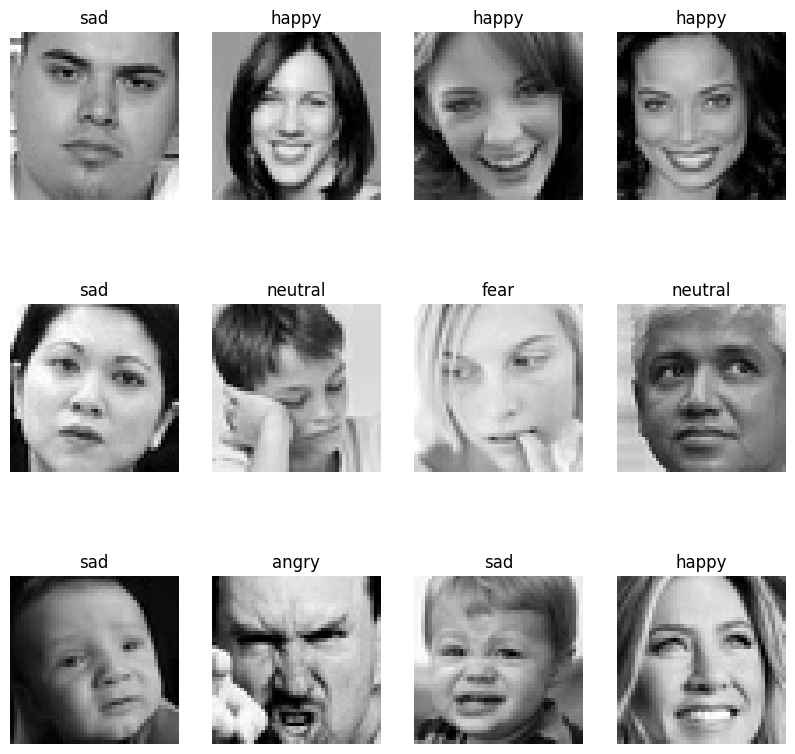

In [15]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in train_dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

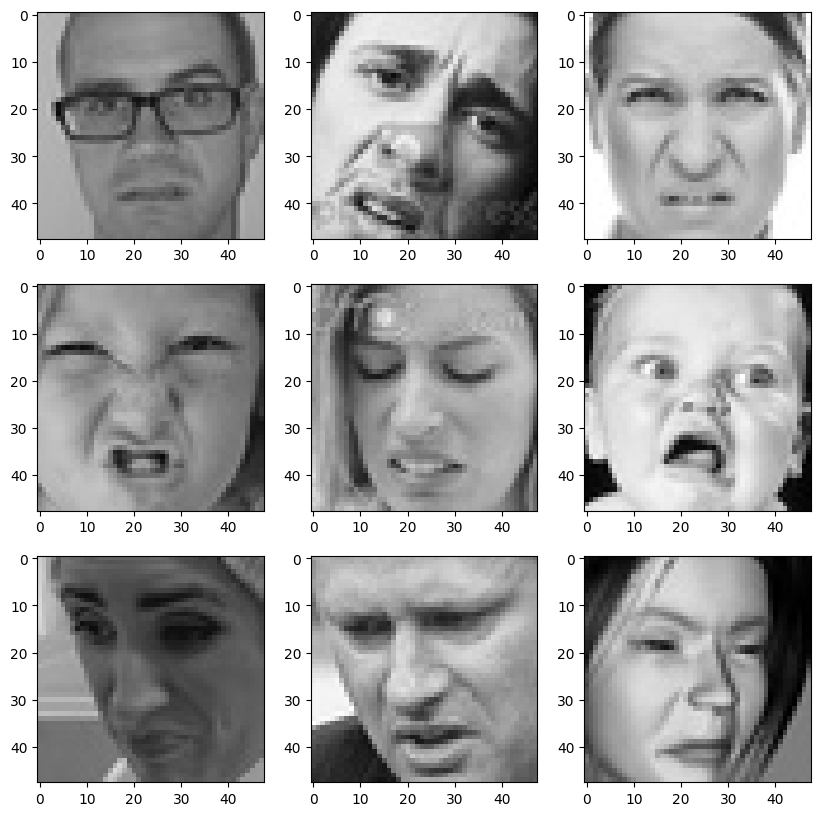

In [16]:
expression = 'disgust'

plt.figure(figsize= (10,10))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(IMG_HEIGHT, IMG_WIDTH))
    plt.imshow(img)
plt.show()

In [17]:
train_data_dir=folder_path+"train/"
validation_data_dir=folder_path+"validation/"

Image Preprocessing

In [18]:
train_datagen = ImageDataGenerator(
    rescale=1./255, # Normalize the pixel values to the range [0, 1]
    rotation_range=30, # Randomly rotate the images by up to 30 degrees
    shear_range=0.3, # Shear the image by up to 30%
    zoom_range=0.3, # Zoom in on the image by up to 30%
    horizontal_flip=True, # Randomly flip the images horizontally
    fill_mode='nearest' # Fill in any missing pixels after a transformation with the nearest pixel value
)

In [19]:
validation_datagen = ImageDataGenerator(rescale=1./255) # Normalize the pixel values to the range [0, 1]

In [20]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir, # Directory containing the training data
    color_mode='grayscale', # Convert images to grayscale
    target_size=(IMG_HEIGHT, IMG_WIDTH), # Resize images to the specified height and width
    batch_size=BATCH_SIZE, # Number of images to return in each batch
    class_mode='categorical', # Return one-hot encoded labels
    shuffle=True # Shuffle the order of the images
)

Found 28821 images belonging to 7 classes.


In [21]:
validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir, # Directory containing the validation data
    color_mode='grayscale', # Convert images to grayscale
    target_size=(IMG_HEIGHT, IMG_WIDTH), # Resize images to the specified height and width
    batch_size=BATCH_SIZE, # Number of images to return in each batch
    class_mode='categorical', # Return one-hot encoded labels
    shuffle=True # Shuffle the order of the images
)

Found 7066 images belonging to 7 classes.


In [22]:
class_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

In [23]:
img, label = train_generator.__next__() # img: (32, 48, 48, 1) label: (32, 7)

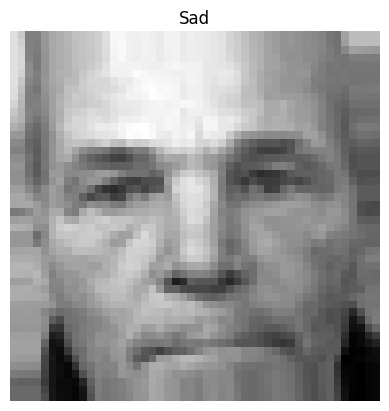

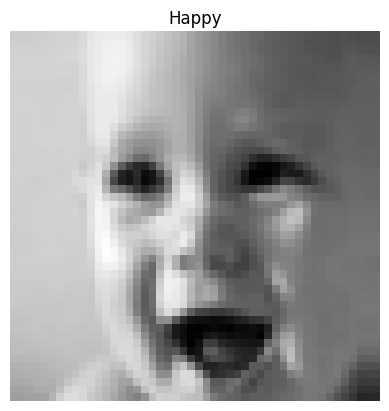

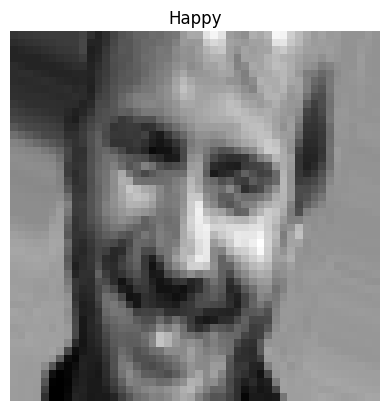

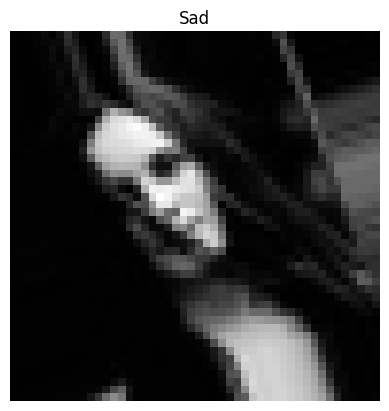

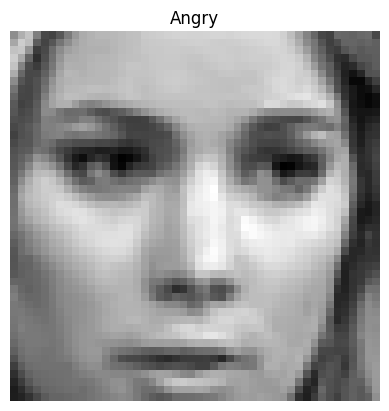

In [24]:
# Plotting the first few images and their labels from the batch
for i in range(5):
    plt.imshow(img[i].reshape(48, 48), cmap='gray')
    plt.title(class_labels[np.argmax(label[i])])
    plt.axis('off')
    plt.show()

In [25]:
train_path = folder_path+"train/"
test_path = folder_path+"validation/"

In [26]:
num_train_imgs = 0
for root, dirs, files in os.walk(train_path):
    num_train_imgs += len(files)

In [27]:
num_test_imgs = 0
for root, dirs, files in os.walk(test_path):
    num_test_imgs += len(files)

Model Architecture

In [28]:
from keras.optimizers import Adam,SGD,RMSprop

no_of_classes = 7

model = Sequential()

#1st CNN layer

# 64=>The number of filters (3, 3)=>The size of the filters  padding = 'same'=>output size=input size.
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1))) # 1 color channel (grayscale)
model.add(BatchNormalization()) # normalizes the inputs of the previous layer
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2))) # To decrease dimentions
model.add(Dropout(0.25)) # To prevent overfitting (Dropout Regularization)

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())  # multi-dimensional input into a 1D vector

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))

opt = Adam(learning_rate=  0.0001)  # Adaptive Moment Estimation (Stochastic Gradient Descent with Momentum)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 64)        256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

In [29]:
epochs=50

history = model.fit(train_generator,
                    steps_per_epoch=num_train_imgs // BATCH_SIZE,
                    epochs=epochs,
                    validation_data=validation_generator,
                    validation_steps=num_test_imgs // BATCH_SIZE,
                    )

Epoch 1/50
900/900 [==============================] - 44s 38ms/step - loss: 2.0035 - accuracy: 0.2215 - val_loss: 1.7386 - val_accuracy: 0.3007
Epoch 2/50
900/900 [==============================] - 33s 37ms/step - loss: 1.8818 - accuracy: 0.2464 - val_loss: 1.7040 - val_accuracy: 0.3124
Epoch 3/50
900/900 [==============================] - 31s 34ms/step - loss: 1.8152 - accuracy: 0.2765 - val_loss: 1.6756 - val_accuracy: 0.3638
Epoch 4/50
900/900 [==============================] - 31s 34ms/step - loss: 1.7518 - accuracy: 0.3075 - val_loss: 1.5955 - val_accuracy: 0.3764
Epoch 5/50
900/900 [==============================] - 31s 34ms/step - loss: 1.6943 - accuracy: 0.3378 - val_loss: 1.5785 - val_accuracy: 0.3893
Epoch 6/50
900/900 [==============================] - 30s 33ms/step - loss: 1.6475 - accuracy: 0.3541 - val_loss: 1.4987 - val_accuracy: 0.4142
Epoch 7/50
900/900 [==============================] - 37s 41ms/step - loss: 1.5892 - accuracy: 0.3804 - val_loss: 1.4032 - val_accuracy:

In [30]:
model.save('Human_Emotion_Recog_Model_50epochs.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


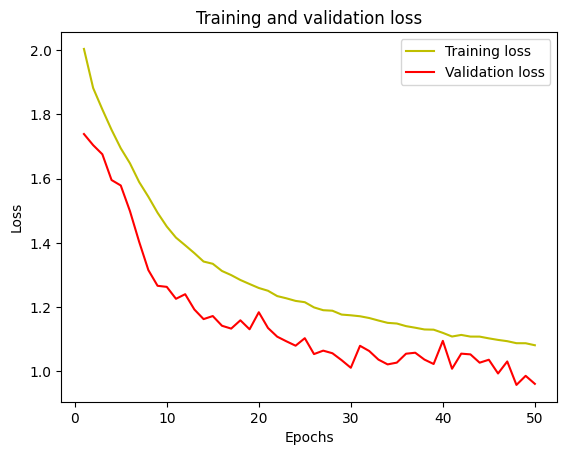

In [32]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

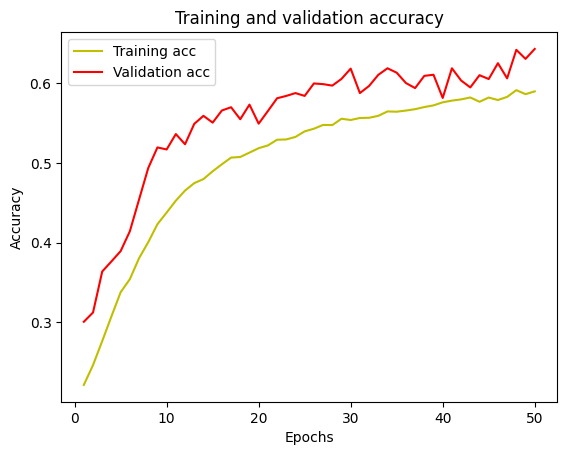

In [34]:
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [37]:
from keras.models import load_model

In [38]:
#Test the model
my_model = load_model('Human_Emotion_Recog_Model_50epochs.h5', compile=False)

In [39]:
#Generate a batch of images (32 images from the validation dataset)
test_img, test_lbl = validation_generator.__next__() #test imag :(32,48,48,1) tast lbl : (32,7)
predictions=my_model.predict(test_img)

predictions = np.argmax(predictions, axis=1) #do prediction of all
test_labels = np.argmax(test_lbl, axis=1)

from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, predictions))

1/1 [==============================] - 0s 200ms/step
Accuracy =  0.6875


In [40]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

<Axes: >

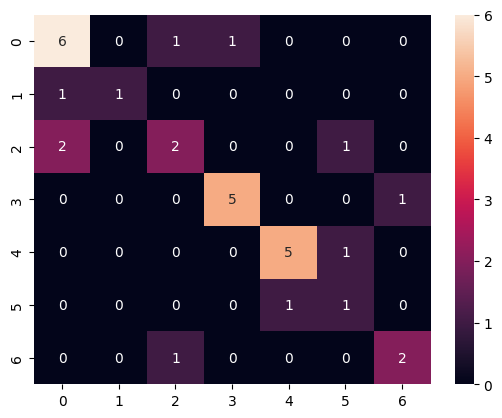

In [41]:
cm = confusion_matrix(test_labels, predictions)
#print(cm)
import seaborn as sns
sns.heatmap(cm, annot=True)

In [42]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(validation_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

221/221 [==============================] - 4s 17ms/step - loss: 0.9602 - accuracy: 0.6432
Test Loss: 0.9602160453796387
Test Accuracy: 0.6432210803031921


221/221 [==============================] - 3s 11ms/step


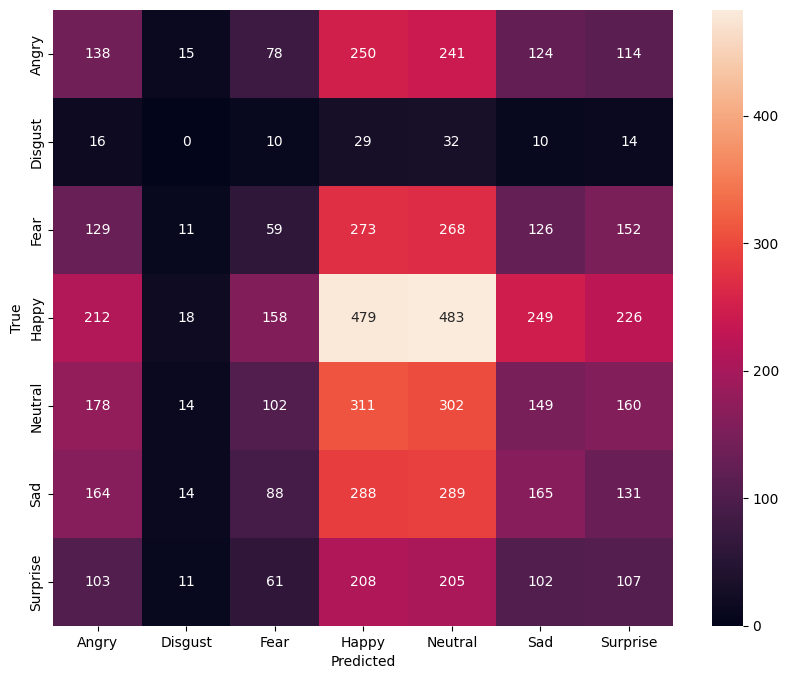

In [43]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get true labels and predictions
true_labels = validation_generator.classes
pred_labels = np.argmax(model.predict(validation_generator), axis=-1)

# Compute confusion matrix
conf_matrix = confusion_matrix(true_labels, pred_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

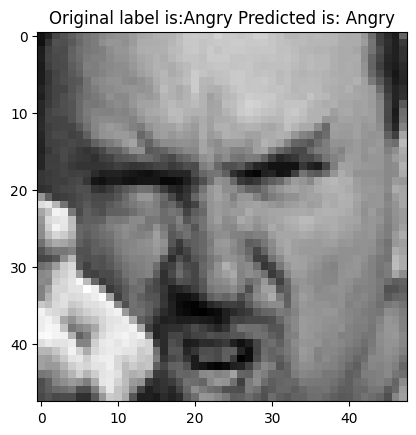

In [44]:
import random
# class_labels=['Angry','Disgust', 'Fear', 'Happy','Neutral','Sad','Surprise']
#Check results on a few select images
n=random.randint(0, test_img.shape[0] - 1)
image = test_img[n]
orig_labl = class_labels[test_labels[n]]
pred_labl = class_labels[predictions[n]]
plt.imshow(image[:,:,0], cmap='gray')
plt.title("Original label is:"+orig_labl+" Predicted is: "+ pred_labl)
plt.show()